Arms/
Full dataset tensor: (784, 30, 30)
Mean: 0.112802
Standard deviation: 0.14514
Figure_normal_legs/
Full dataset tensor: (622, 30, 30)
Mean: 0.0884223
Standard deviation: 0.165164
FigureWheels/
Full dataset tensor: (222, 30, 30)
Mean: 0.0751233
Standard deviation: 0.168167
Head/
Full dataset tensor: (473, 30, 30)
Mean: 0.0372897
Standard deviation: 0.202716
Total samples number: (2101, 30, 30)
Samples for tests: 526
Samples for trains: 1575
(30, 30)
4


c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:96: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(900, kernel_initializer="uniform", input_shape=(900,), activation="relu")`
c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:97: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(112, kernel_initializer="uniform", activation="relu")`
c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:98: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(225, kernel_initializer="uniform", activation="relu")`
c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(450, kernel_initializer="uniform", activation="relu")`
c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:101: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 900)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 900)               810900    
_________________________________________________________________
dense_18 (Dense)             (None, 112)               100912    
_________________________________________________________________
dense_19 (Dense)             (None, 225)               25425     
_________________________________________________________________
dense_20 (Dense)             (None, 450)               101700    
_________________________________________________________________
output (Dense)               (None, 4)                 1804      
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total para

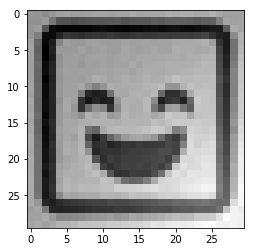

In [6]:
import numpy as np
from scipy import ndimage
from PIL import Image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from sklearn.metrics import accuracy_score as score_it
import os
import h5py
import sys

from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
image_size = 30  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
folders = [
    'Arms/',
    'Figure_normal_legs/',
    'FigureWheels/',
    'Head/',

]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    img = Image.open(image_file)
    new = img.resize((30, 30), Image.ANTIALIAS)
    try:
      image_data = (np.array(new).astype(float) - pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 222))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    


X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)

X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')



callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init = 'uniform', activation = 'relu'))
model.add(Dense(int(input_dim/2), init = 'uniform', activation = 'relu'))

model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=15,
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2


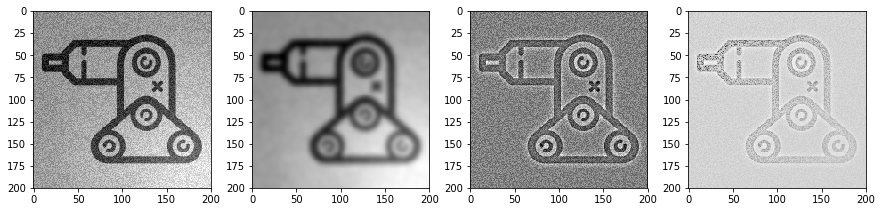

c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log2


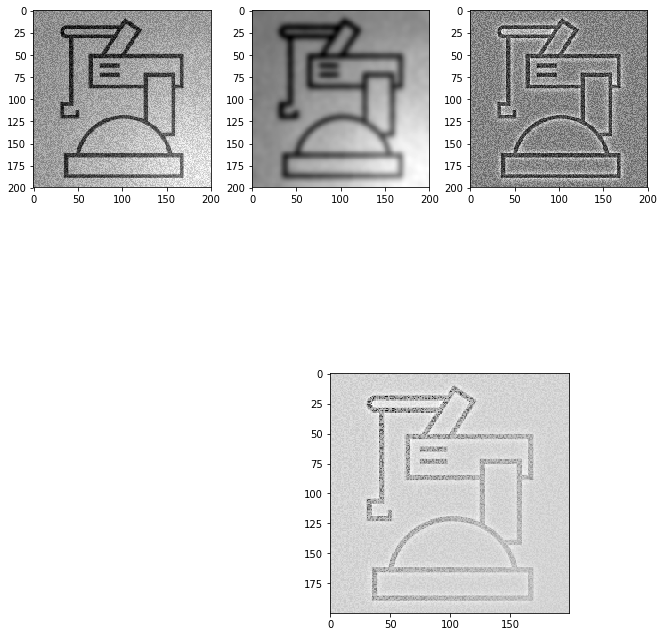

In [8]:

from scipy import ndimage as nimg 

im = img.imread('Arms/127.png')
fim = nimg.gaussian_filter(im, 3)
fig = plt.figure(figsize=(15, 15))
plt.subplot(441)
plt.imshow(im, cmap = 'gray')
plt.subplot(442)
plt.imshow(fim, cmap='gray')
plt.subplot(443)
plt.imshow((im-fim), cmap = 'gray')

maxi = (im - fim).max()
mini = (im - fim).min()

diff = np.log2(im) - np.log2(fim)

newImage = (diff-mini)/(maxi-mini)

plt.subplot(444)
plt.imshow(newImage, cmap='gray')
plt.show()

im = img.imread('Arms/529.png')
fim = nimg.gaussian_filter(im, 3)
fig = plt.figure(figsize=(15, 15))
plt.subplot(445)
plt.imshow(im, cmap = 'gray')
plt.subplot(446)
plt.imshow(fim, cmap='gray')
plt.subplot(447)
plt.imshow((im-fim), cmap = 'gray')

maxi = (im - fim).max()
mini = (im - fim).min()

diff = np.log2(im) - np.log2(fim)

newImage = (diff-mini)/(maxi-mini)

plt.subplot(338)
plt.imshow(newImage, cmap='gray')
plt.show()